In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
device = 'mps'

In [4]:
df = pd.read_excel('Data.xlsx', index_col=0)
arr = df.values
arr = arr.astype(np.float32)
ts = torch.tensor(arr)
ts = ts.to(device)
ts.shape

torch.Size([759, 9])

In [5]:
train_size = int(len(ts) * 0.7)
test_size = len(ts) - train_size
ts = ts[torch.randperm(ts.size(0)), :]
train_Data = ts[:train_size, :]
test_Data = ts[train_size:, :]
train_Data.shape, test_Data.shape

(torch.Size([531, 9]), torch.Size([228, 9]))

In [6]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(8, 32), nn.Sigmoid(),
            nn.Linear(32, 8), nn.Sigmoid(),
            nn.Linear(8, 4), nn.Sigmoid(),
            nn.Linear(4, 1), nn.Sigmoid()
        )
    def forward(self, x):
        y = self.net(x)
        return y

In [7]:
model = DNN().to(device)
model

DNN(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=32, out_features=8, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=4, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [8]:
loss_fn = nn.BCELoss(reduction='mean')

In [9]:
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

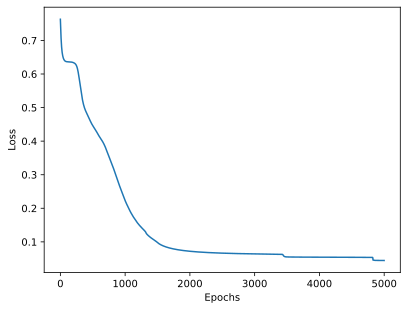

In [11]:
epochs = 5000
losses = []

X = train_Data[:, :-1]
y = train_Data[:, -1].reshape((-1, 1))

for epoch in range(epochs):
    Pred = model(X)
    loss = loss_fn(Pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
Fig = plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [13]:
X = test_Data[:, :-1]
Y = test_Data[:, -1].reshape((-1, 1))

with torch.no_grad():
    Pred = model(X)
    Pred[Pred >= 0.5] = 1
    Pred[Pred < 0.5] = 0
    correct = torch.sum((Pred == y).all(1))
    total = Y.size(0)
    print('Accuracy: {}%'.format(100 * correct / total))

Accuracy: 68.85964965820312%
